In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as mtrcs
import random
from multiprocessing import Pool
from tqdm import trange, tqdm

%matplotlib inline

y_data = [0.006,0.02,0.042,0.072,0.11,0.162,0.232,0.332,0.494,1.0]
x_data = [(x + 1)/10 for x in range(10)]

LR = 0.005

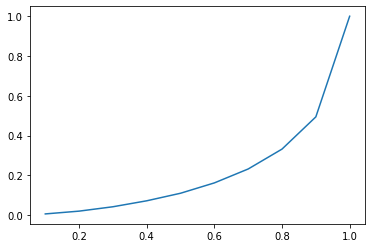

In [3]:
plt.plot(x_data, y_data)

In [9]:
class Model():
    def __init__(self):
        self.hyper_n = 100
        self.b_list = [random.random()/1000 for x in range(self.hyper_n)]
        self.r2 = 0
        self.loss = 0
        self.results = []
#         self.p_forward = Pool()
#         self.p_backward = Pool()
    def mse(self, y_data):
        tmp = [(y_data[i] - o) ** 2 for i, o in enumerate(self.results)]
        return sum(tmp) / len(tmp)
    def forward_pass(self, x_data):
        self.results = []
        for x in x_data:
            self.results.append(sum([(x ** (i + 1)) * b for i, b in enumerate(self.b_list)]))
        return self.results
    def backpropogate(self, x_data, y_data):
#         derivatives = [sum([2 * (i + 1) * b * (x ** i) * (self.results[j] - y_data[j]) for j, x in enumerate(x_data)]) for i, b in enumerate(self.b_list)]
        derivatives = [sum([2 * (x ** i) * (self.results[j] - y_data[j]) for j, x in enumerate(x_data)]) for i, b in enumerate(self.b_list)]
        for i, d in enumerate(derivatives):
            self.b_list[i] -= d * LR
        self.loss = self.mse(y_data)
        self.r2 = mtrcs.r2_score(y_data, self.results)
#     print(f'Backpropogation completed with loss of {self.loss} and r2 value of {self.r2}',end='\r')
    
model = Model()

In [10]:
saved_weights = [0.022794966887037086, 0.38679954206734235, 1.6575126186708116e-18, 3.6066554693488e-17, 2.4479375267259837e-08, 0.02782823664977261, 0.27125042362988144, 0.01077225931494082, 9.750376091849139e-06, 5.142880303569075e-09, 4.433254127050826e-12, 1.7702132231646362e-13, 1.3976413267562914e-15, 2.2668139385645383e-13, 8.513590517923411e-13, 1.1633053197689978e-11, 2.3013677517080675e-11, 4.4433604264814945e-09, 7.529400324246604e-08, 8.466100612901005e-09, 3.918819952774043e-06, 6.697873379528897e-05, 0.00010768806701366537, 0.001639321911346495, 0.005591439162073219, 0.0057811557829695595, 0.010231702883039342, 0.017817659542707233, 0.014194661800244035, 0.06941508431270643, 0.04853618994211445, 0.03729721505588394, 0.013770313634011865, 0.023390895549347746, 0.01778091267636387, 0.004889624207710503, 0.005307408986895678, 0.001563989188928049, 0.0004939463614832483, 0.0009070164749678498, 0.0006630121623332782, 0.0005025067469738745, 0.00011239377904453482, 0.000224289774650805, 6.650630737823924e-05, 7.63621638541099e-05, 3.498111668338758e-05, 4.329635245755705e-05, 5.248863915695327e-06, 4.665333614426717e-06, 2.0357894317044866e-06, 4.848349503049015e-06, 4.727178874921569e-06, 5.071651333852877e-06, 1.1146552630700468e-06, 2.241278003411255e-06, 7.873738683469111e-07, 1.5652784309974772e-06, 3.362939983325618e-07, 3.124030124936194e-07, 4.826185461744104e-07, 1.3303650589940566e-07, 2.1709998698656816e-07, 1.8338944116610392e-07, 6.10574102513269e-09, 3.483370700211073e-08, 3.088184065928292e-08, 5.103484537817617e-08, 2.4394241090211776e-08, 4.528658909729065e-08, 5.651713125780142e-08, 1.3030157710220207e-08, 1.494207679714811e-08, 1.5873729020409987e-08, 2.6729472451557187e-08, 1.9838353714176232e-08, 7.25033928178983e-09, 1.5765532452753986e-08, 3.4614556584581385e-09, 5.129996375128309e-09, 8.989011285385643e-09, 3.0399051747379453e-09, 2.6078464654583103e-09, 2.140734256989687e-11, 2.1490893338521948e-09, 1.3217631550655618e-09, 2.883822437720924e-09, 2.39563433530812e-09, 1.616436794081185e-09, 6.938976995509723e-10, 3.204992789780701e-10, 1.7943480295174862e-10, 6.055710093721396e-11, 4.4812531227110805e-10, 6.055589831059936e-10, 4.241209520444789e-10, 1.5261439757579497e-10, 2.1980457920889383e-10, 2.4383304131119596e-10, 6.132699316745875e-11]
saved_weights1 = [0.023070146795452967, 0.38379157735693203, 0.006718516404288282, -0.014378094737395252, 0.0404150244199437, 0.07261800057079389, 0.07594984378475837, 0.0634946932360781, 0.04639775878074085, 0.03010460819645215, 0.017045245130772126, 0.008407974839608982, 0.0026127399641891753, -0.00012546005458850826, -0.0015691332930907697, -0.001543912567557937, -0.0009506542279917797, -1.3183741421605997e-05, 0.0008343558006450839, 0.0019698656345813652, 0.0022766515638419555, 0.0032497946968075165, 0.0034185264499576014, 0.004309752836550532, 0.0045864045135181695, 0.00431031596206271, 0.00481576608743918, 0.005072907732098591, 0.005093618524188072, 0.00522658516575205, 0.004873486329585498, 0.005030344697562063, 0.004572072644839283, 0.004597117888375854, 0.00475024387687907, 0.004173380897139006, 0.00364126632832702, 0.003775782651918894, 0.00389297092517302, 0.0037876920800783, 0.0031792592182581076, 0.0037374367065063103, 0.0034380747829506134, 0.0035177879807289578, 0.003292386561403994, 0.003216910854695308, 0.0034082520240216476, 0.0030184134991921912, 0.002950566804529379, 0.002783719713551719, 0.00314347444036744, 0.00243369886216867, 0.0027202064385495575, 0.0024924390562646994, 0.002990034441976428, 0.002752173266819494, 0.0030939706791007337, 0.002553370733826875, 0.0027197839317981394, 0.0024336945529237013, 0.0029004559593328308, 0.0021966422710447873, 0.002792207415237001, 0.00301275666553339, 0.002872856210577249, 0.002382891060191778, 0.002571464858380511, 0.002150309412685008, 0.0023967985484026066, 0.0021081959766659445, 0.0026289127237009505, 0.00272727210928413, 0.002655758922277447, 0.0021294165975018703, 0.002500312222797719, 0.0029177728495183887, 0.002749647993064047, 0.002324416264161038, 0.0025080619050958184, 0.002853016568109954, 0.002555977518886928, 0.002521062454958232, 0.0023379525468501024, 0.002517736126973153, 0.002321899354880264, 0.0022876446868965667, 0.002990356054599913, 0.0025391387759514496, 0.002301617314917596, 0.002588310112296953, 0.0024583180274272, 0.002587585306765031, 0.002499267756448978, 0.00213055221543022, 0.00250703030788309, 0.002093436368075152, 0.002445564764358615, 0.00203844127500435, 0.002174616394916026, 0.0025442971053820165]
model.b_list = saved_weights1

In [11]:
pbar = trange(1000000, desc="r2 = {r2:.20f}".format(r2=model.r2))
for i in pbar:
    pbar.set_description("r2 = {r2:.20f}".format(r2=model.r2))
    pbar.refresh()
    model.forward_pass(x_data)
    model.backpropogate(x_data, y_data)

r2 = 0.99999856846640911012:   0%|          | 514/1000000 [00:01<48:51, 340.89it/s]


KeyboardInterrupt: 

In [4]:
print(model.b_list)

[0.023070146795452967, 0.38379157735693203, 0.006718516404288282, -0.014378094737395252, 0.0404150244199437, 0.07261800057079389, 0.07594984378475837, 0.0634946932360781, 0.04639775878074085, 0.03010460819645215, 0.017045245130772126, 0.008407974839608982, 0.0026127399641891753, -0.00012546005458850826, -0.0015691332930907697, -0.001543912567557937, -0.0009506542279917797, -1.3183741421605997e-05, 0.0008343558006450839, 0.0019698656345813652, 0.0022766515638419555, 0.0032497946968075165, 0.0034185264499576014, 0.004309752836550532, 0.0045864045135181695, 0.00431031596206271, 0.00481576608743918, 0.005072907732098591, 0.005093618524188072, 0.00522658516575205, 0.004873486329585498, 0.005030344697562063, 0.004572072644839283, 0.004597117888375854, 0.00475024387687907, 0.004173380897139006, 0.00364126632832702, 0.003775782651918894, 0.00389297092517302, 0.0037876920800783, 0.0031792592182581076, 0.0037374367065063103, 0.0034380747829506134, 0.0035177879807289578, 0.003292386561403994, 0.0

In [6]:
import decimal

# create a new context for this task
ctx = decimal.Context()

# 20 digits should be enough for everyone :D
ctx.prec = 100

def float_to_str(f):
    """
    Convert the given float to a string,
    without resorting to scientific notation
    """
    d1 = ctx.create_decimal(repr(f))
    return format(d1, 'f')

In [7]:
equation = "f(x) = "
for i,b in enumerate(model.b_list):
    equation += f"{float_to_str(b)}x^{{{i+1}}}"
    if i < len(model.b_list) - 1:
        equation += " + "
print(equation)

f(x) = 0.023070146795452967x^{1} + 0.38379157735693203x^{2} + 0.006718516404288282x^{3} + -0.014378094737395252x^{4} + 0.0404150244199437x^{5} + 0.07261800057079389x^{6} + 0.07594984378475837x^{7} + 0.0634946932360781x^{8} + 0.04639775878074085x^{9} + 0.03010460819645215x^{10} + 0.017045245130772126x^{11} + 0.008407974839608982x^{12} + 0.0026127399641891753x^{13} + -0.00012546005458850826x^{14} + -0.0015691332930907697x^{15} + -0.001543912567557937x^{16} + -0.0009506542279917797x^{17} + -0.000013183741421605997x^{18} + 0.0008343558006450839x^{19} + 0.0019698656345813652x^{20} + 0.0022766515638419555x^{21} + 0.0032497946968075165x^{22} + 0.0034185264499576014x^{23} + 0.004309752836550532x^{24} + 0.0045864045135181695x^{25} + 0.00431031596206271x^{26} + 0.00481576608743918x^{27} + 0.005072907732098591x^{28} + 0.005093618524188072x^{29} + 0.00522658516575205x^{30} + 0.004873486329585498x^{31} + 0.005030344697562063x^{32} + 0.004572072644839283x^{33} + 0.004597117888375854x^{34} + 0.004750

In [8]:
equation = "f(x) = {} & "
counter = 0
for i,b in enumerate(model.b_list):
    if counter == 2:
        counter = 0
        equation += "\\\\\n\t& "
    equation += f"{float_to_str(b)}x^{{{i+1}}}"
    if i < len(model.b_list) - 1:
        equation += " + "
    counter += 1
print(equation)

f(x) = {} & 0.023070146795452967x^{1} + 0.38379157735693203x^{2} + \\
	& 0.006718516404288282x^{3} + -0.014378094737395252x^{4} + \\
	& 0.0404150244199437x^{5} + 0.07261800057079389x^{6} + \\
	& 0.07594984378475837x^{7} + 0.0634946932360781x^{8} + \\
	& 0.04639775878074085x^{9} + 0.03010460819645215x^{10} + \\
	& 0.017045245130772126x^{11} + 0.008407974839608982x^{12} + \\
	& 0.0026127399641891753x^{13} + -0.00012546005458850826x^{14} + \\
	& -0.0015691332930907697x^{15} + -0.001543912567557937x^{16} + \\
	& -0.0009506542279917797x^{17} + -0.000013183741421605997x^{18} + \\
	& 0.0008343558006450839x^{19} + 0.0019698656345813652x^{20} + \\
	& 0.0022766515638419555x^{21} + 0.0032497946968075165x^{22} + \\
	& 0.0034185264499576014x^{23} + 0.004309752836550532x^{24} + \\
	& 0.0045864045135181695x^{25} + 0.00431031596206271x^{26} + \\
	& 0.00481576608743918x^{27} + 0.005072907732098591x^{28} + \\
	& 0.005093618524188072x^{29} + 0.00522658516575205x^{30} + \\
	& 0.004873486329585498x^{31} + 

In [ ]:
values = []
for i,letter in enumerate(equation):
    if equation[i-1] in ['~','+'] and letter == ' ':
        start = i + 1
    if letter == 'x':
        end = i
        values.append(float(equation[start:end]))
print(values)
print(len(values))

[0.02280762602348304, 0.38674067122701355, 1.3170910247312021e-17, 2.1576811072506523e-16, 5.199681764172789e-08, 0.030292900425790255, 0.26579211490487914, 0.013888048728293042, 1.9189444125143883e-05, 1.521875572802927e-08, 1.7847751932584996e-11, 8.539228649772306e-13, 7.164281833511482e-15, 1.1201989261182644e-12, 3.781216157631011e-12, 4.4414137920948904e-11, 7.380273246178701e-11, 1.1888410026345188e-08, 1.6890545633344755e-07, 1.6126363658484024e-08, 6.44863983916205e-06, 9.708931610809931e-05, 0.00014029131086793376, 0.001957116291767684, 0.0062297183822945515, 0.0061111198752881735, 0.010412823068695018, 0.017681019530622333, 0.013884664994109576, 0.06754380706965617, 0.04733745279938467, 0.03668620599141435, 0.013727964160670791, 0.0237265996692959, 0.018406398360357547, 0.00517710352083888, 0.005756870200215155, 0.0017398008617261936, 0.0005638869553005879, 0.0010629414881281618, 0.0007976537013856074, 0.0006205220548759612, 0.0001424072639363925, 0.000291455436699568, 8.858

In [ ]:
model.b_list = values

In [4]:
k = 10 ** 8
recs = []
def calc_rec(n):
    global k
    return (1/k) * model.forward_pass([((n)/k) - (1/(2*k))])[0]

def calc_chunks(n_list):
    global k
    area = 0
    for n in tqdm(n_list):
        area += (1/k) * model.forward_pass([((n)/k) - (1/(2*k))])[0]
    return area
        
import math
n = math.ceil(k/32)
chunks = [range(1, k+1)[i * n:(i + 1) * n] for i in range((k + n - 1) // n )]
        
p = Pool(32)
# for n in tqdm(range(1, k + 1)):
#     recs.append(calc_rec(n))
print("Starting pool...")
recs = p.map(calc_chunks, chunks)
# recs = p.map(calc_rec, range(k - 1))

  0%|          | 2277/3125000 [00:00<02:17, 22763.94it/s]

Starting pool...


100%|██████████| 3125000/3125000 [01:25<00:00, 36652.33it/s]
Process ForkPoolWorker-18:
Process ForkPoolWorker-25:
Process ForkPoolWorker-10:
Process ForkPoolWorker-30:
Process ForkPoolWorker-15:
Process ForkPoolWorker-26:
Process ForkPoolWorker-24:
Process ForkPoolWorker-17:
Process ForkPoolWorker-11:
Process ForkPoolWorker-31:
Process ForkPoolWorker-23:
Process ForkPoolWorker-19:
Process ForkPoolWorker-6:
Process ForkPoolWorker-12:
Process ForkPoolWorker-21:
Process ForkPoolWorker-3:
Process ForkPoolWorker-14:
Process ForkPoolWorker-32:
Process ForkPoolWorker-22:
Process ForkPoolWorker-7:
Process ForkPoolWorker-28:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-13:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-27:
Process ForkPoolWorker-20:
Traceback (mos

In [5]:
print(len(recs))
area = sum(recs)
print("\n" + str(area))

32

0.18666900017981225


[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]


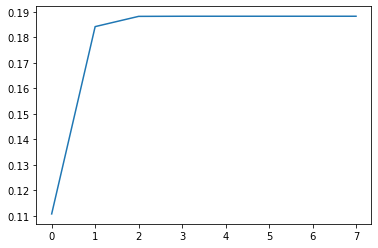

In [36]:
areas_y = [0.11069342869419228,0.18413878550276258,0.1881572698868828,0.18820527485903313,0.1882057558616742,0.1882057606717955,0.18820576071989983,0.18820576072036385,0.18820576072038028]
areas_x = [10**i for i in range(len(areas_y))]
print(areas_x)
plt.plot(areas_y)

In [11]:
print(200*(0.5-0.18666900017981225))

62.66619996403755


In [8]:
print(model.forward_pass([1.00])[0]-model.forward_pass([0.99])[0])

0.10411620659512832
